<a href="https://colab.research.google.com/github/brajeshkumar1989/Deep_Computer_Vision_With_CNNs/blob/main/Deep_Computer_Vision_With_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There is a image 100 X 100 has total 10000 pixels, and if the first layer of NN has 1000 neurons , then it means there are total 10 million connections only in first layer (that is huge).CNN solves this problem using partially connected layers and weights sharing.

# ${\mathbf{Convolutional \ Layers}}$

The most important building block of CNN is convolutional layer.

Neurons in the first convolutional layer are not connected to every single pixel in the input imagebut only to pixels in the receptive fields.

Each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.
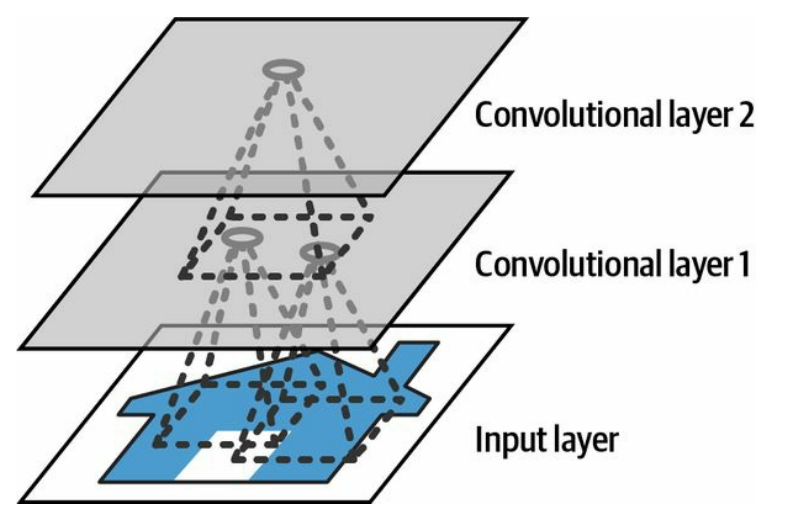

In CNN each layer is represented in 2D, which makes it easier to match neurons with their corresponding inputs.

in below diagram, a neuron located in row i, column j of a given layer is connected to the output of the neurons in the previous layer located in rows $i$ to ${i+f_h -1}$, columns $j$ to $j+f_w -1$, where $f_h$ & $f_w$ are the height and width of the receiptive field.

In order to have the same height and width as the previous layer, it is common to add zeros around the input (shown in below diagram as dotted line), this is called zero padding.

It is possible to connect large input layer to a much smaller layer by spacing out the receptive fields, this dramatically reduces the model's computational complexity.

The horizontal or vertical step size from one receptive field to the next is called the $stride$.

In the diagram, a 5X7 input layer(plus zero padding) is connected to a 3 X 4 layer, using 3 X3 receptive fields and a stride of 2 (blue box starts after 2 stride includes zero padding stride), here stride is 2 which is same in both direction , but it can be of different width and height.

A neuron located in row $i$, and column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i \times s_h$ to $i \times s_h +f_h -1$, columns $j \times s_w$ to $j \times s_w + f_w -1$, where $s_h$ & $s_w$ are the vertical and horizontal strides.   

Receptive field -> a small size matrix of pixels connected to single pixel of next layer, $f_h$ & $f_w$ are receptive in below diagram.

Stride -> step size taken by the Receptive field , in this case it is 2 , so receptive is moving two step horizantal and also in vertical direction which is connected to single neuron of next layer.

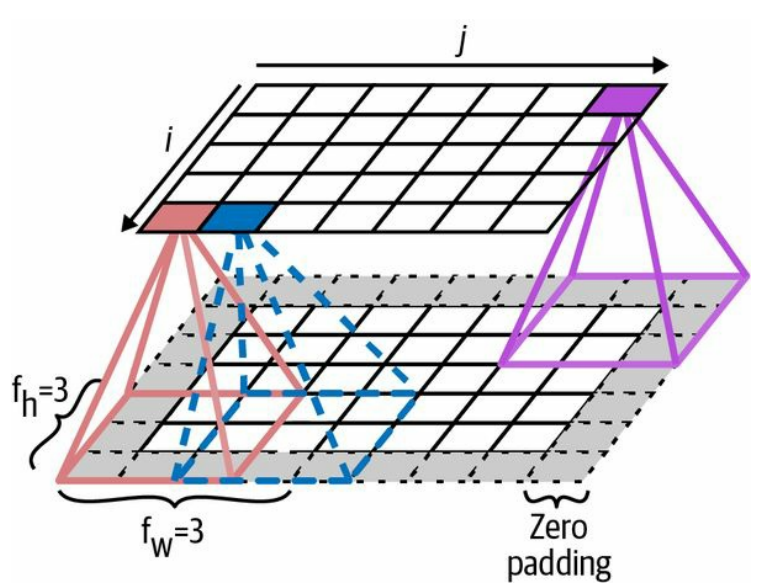

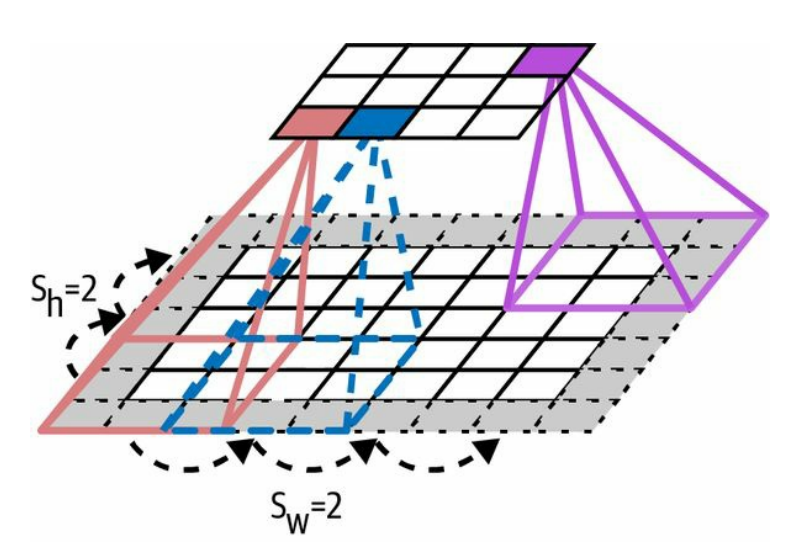

## $Filters \ (weight)$
Neuron's weight can be represented as a small image the size of the receptive field.

these small size of weights called filter. in below diagram 2 weights or filters are there (black box with vertical line and black bok with horizontal line at the center.) (black=0, white=1) neurons using these weights will ignore everything in their receptive field except for the central vertical line(since all input will be multiply by 0 except the central vertical line and same for horizontal line ).

if all the neurons in a layer use the same vertical line (weight) and below image (bottom one) will pass to the same layer of neurons will produce left upper image. Same case for right upper image generated by using filter (hosizontal line).

Layer full of neuron using the same filter outputs a $Feature \ map$. that highlight the areas in an image that activate the filter the most. (These feature map will be automatically handled during training the convolutional layer and it doesn't need to define manually), and the layer above will learn to combine them into more complex patterns.

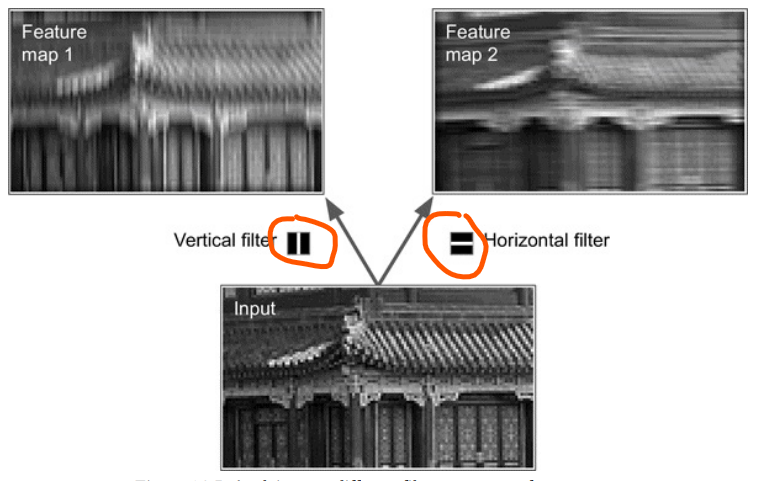

# $\mathbf{Stacking \ Multiple \ Feature \ Maps}$

In real time there will be multiple filters, which output one feature map per filter.

Representing in 3d in below diagram.

It has one neuron per pixel in each feature map, and all neurons within a given feature map share the same parameters (i.e. the same kernel and bias term).

Neurons in different feature map use different parameters. the neuron's receptive field will extends across all the feature maps of the previous layer.

In short, a convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of etecting multiple features anywhere in its inputs.

In below diagram there are two convolutional layers with multiple filters each (kernel), processing a color image with three color channels; each convolutional layer outputs one feature map per filter.


All neurons in a feature map shares same number of parameters in the model. Once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location .  In contrast once a fully connected neural network has learned to recognize a pattern in one location , it can only recognize it in that perticular location.

feature maps of one convolutional layer connects to the output of neurons in the previous convolutional layer across all feature maps in the same previous convolutional layer.

Within current convolutional layer all neurons located in the same row i and column j but in different feature maps are connected to the outputs of the exact same neurons in the previous layer.


$Z_{i,j,k}=b_k+\sum_{u=0} ^{f_h -1} \sum_{v=0}^{f_w-1}\sum_{k'=0} ^{f_n'-1} X_{i',j',k'} \times W_{u,v,k'}$ , K with $i'=i \times s_h +u_j'= j \times s_w+v$

- $Z_{i,j,k}$ is the output of the neuron located in row $i$, column $j$ in the feature map $k$ of the convolutional layer (layer $l$).

- $s_h$ & $s_w$ are vertical and horizontal strides, $f_h$ & $f_w$ are the height and width of the receptive field, and $f_n'$ is the number of feature maps in the previous layer ($l-1$) .

- $X_{i',j',k'}$ is the output of the neuron located in the layer $l-1$, row $i'$, column $j'$, feature map $k'$ (or channel $k'$ if the previous layer is the input layer).

- $b_k$ is the bias term for feature map $k$ (in layer $l$). it is kind of a knob that tweak the overall brightness of the feature map $k$.

- $w_{u,v,k',k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row u, column v(relative to the neuron's receptive field), the feature map $k'$.


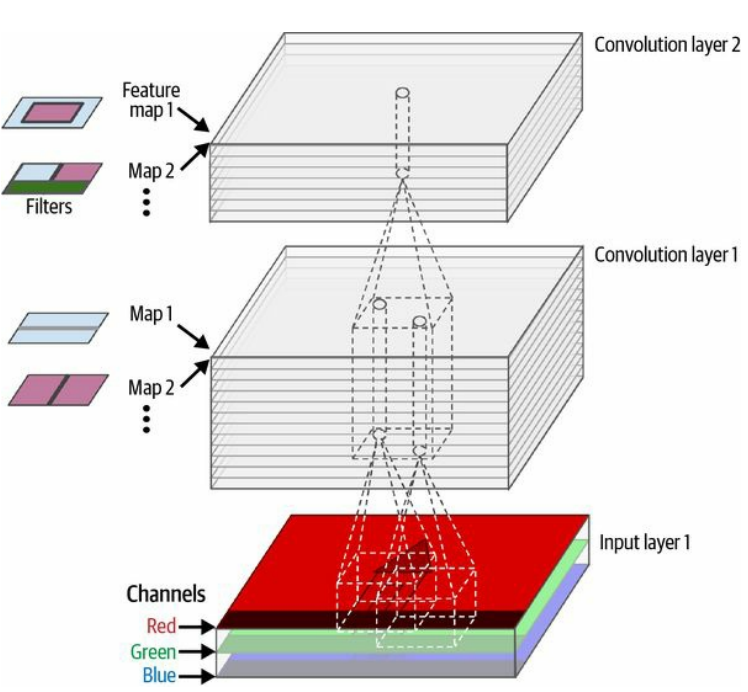

### Setup
This project requires Python 3.7 or above:

In [ ]:
import sys
assert sys.version_info >=(3, 7)

It also requires Scikit-Learn >= 1.0.1

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

TensorFlow ${≥}$ 2.8:

In [ ]:
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

Defining default font size to make the figure prettier:

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',size=14)
plt.rc('axes',labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick',labelsize=10)

below code to check if there is one GPU else issue a warning:

In [ ]:
# is this notebook running on Colab or Kaggle?
IS_COLAB= "google.colab" in sys.modules
IS_KAGGLE="kaggle_secrets" in sys.modules

if not tf.config.list_physical_devices('GPU'):
  print("No GPU was detected. Neural nets can be very slow without a GPU.")
  if IS_COLAB:
    print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

  if IS_KAGGLE:
    print("Go to Settings > Accelerator and select GPU.")

No GPU was detected. Neural nets can be very slow without a GPU.
Go to Runtime > Change runtime and select a GPU hardware accelerator.


# Convolutional Layers

## Implementing Convolutional Layers with Keras

Loading two sample images, rescale their pixel values to 0-1 , and center crop them to small 70 ${\times}$120 images:

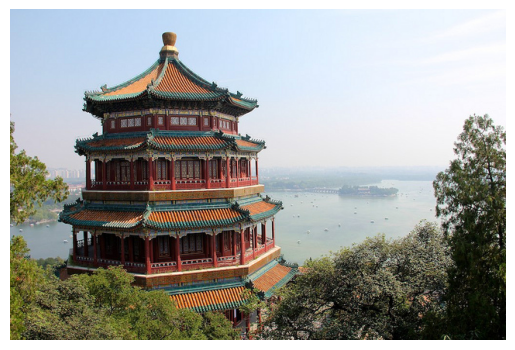

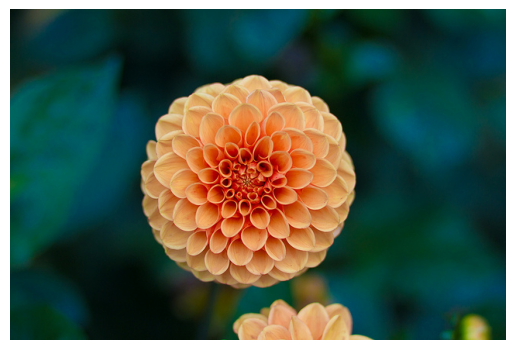

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images= load_sample_images()["images"]
#below code is just to check what is there inside of images
for image in images:
  plt.imshow(image)
  plt.axis('off')
  plt.show()

Cropping and rescaling images

In [ ]:
#tf.keras.layers.CenterCrop: This is a layer provided by Tensorflow keras that crops the central part of the images
#to a specified size

# (height=70, width=120): These parameters specify the target height and width of the cropped images.

#(images): This applies the center cropping operation to the images tensor.
images=tf.keras.layers.CenterCrop(height=70, width=120)(images)
images= tf.keras.layers.Rescaling(scale=1/255)(images)

In [ ]:

'''
2= batch size (contains two images)
70 = height of each image
120= width of each image
3= channel (3 means it is colourful image)
'''
images.shape

TensorShape([2, 70, 120, 3])

In [ ]:
# Create a 2D convolutional layer and pass 2 images as input to the same.
# Created convolutional layer with 32 filters (means 32 feature maps) each of size
# 7 X 7
# and apply this to batch of 2 images.
tf.random.set_seed(42)
conv_layer=tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps=conv_layer(images)

In [ ]:
# the output shape is similar to input shape with two main difference
# First there are 32 channels instead of 3, this is because we set filters=32
# so we get 32 output feature maps: instead of the intensity of red, green, and blue.
# at each location. we now have intensity of each feature at each location.
# second the height and width have both shrunk by 6 pixels, this is because ConvD layer
# does not use any zero-padding by default, which means that we lose a few pixels
# on the sides of the o/p feature maps.
# since the kernel size is 7,it lose 3 pixels in each side.
fmaps.shape

TensorShape([2, 64, 114, 32])

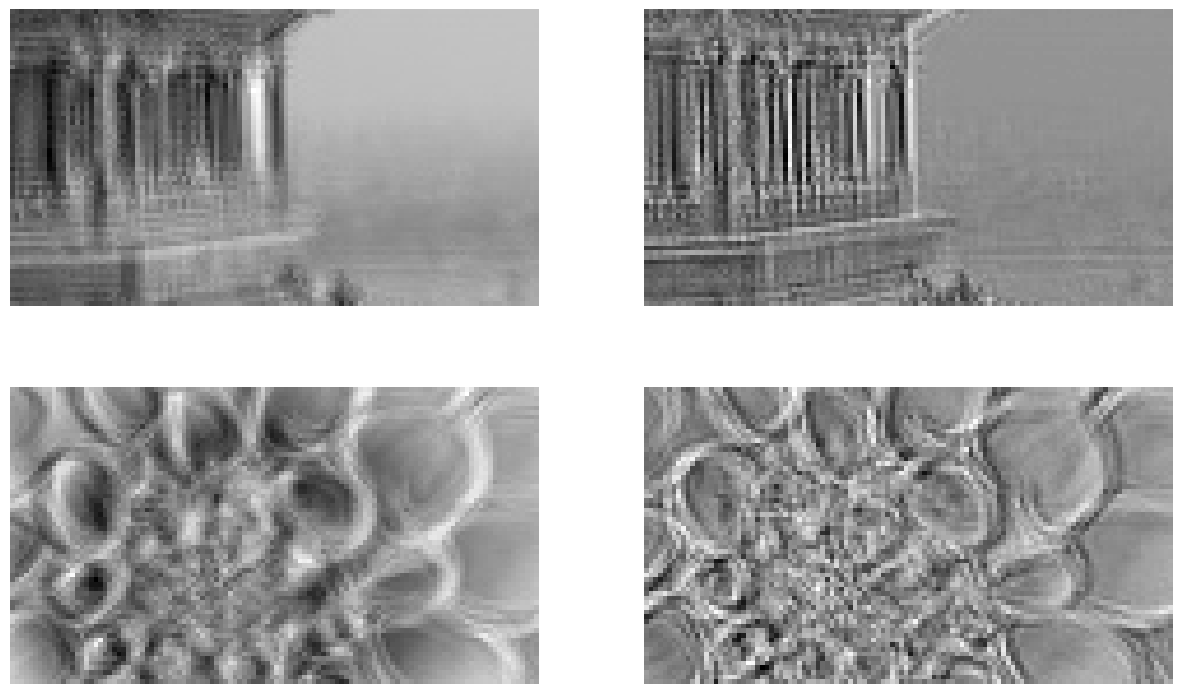

In [ ]:
plt.figure(figsize=(15,9))
for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2,image_idx * 2 + fmap_idx +1)
    plt.imshow(fmaps[image_idx, :,:, fmap_idx], cmap='gray')
    plt.axis("off")

plt.show()

Can see , randomly generated filters typically act like edge detectors, this is useful tool for image processing, and that is the type of filters that a convolutional layer typically starts with. then during training, it gradually learns improved filters to recognize useful patterns for the task.

Now using zero padding

In [ ]:
conv_layer= tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding='same')
fmaps=conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

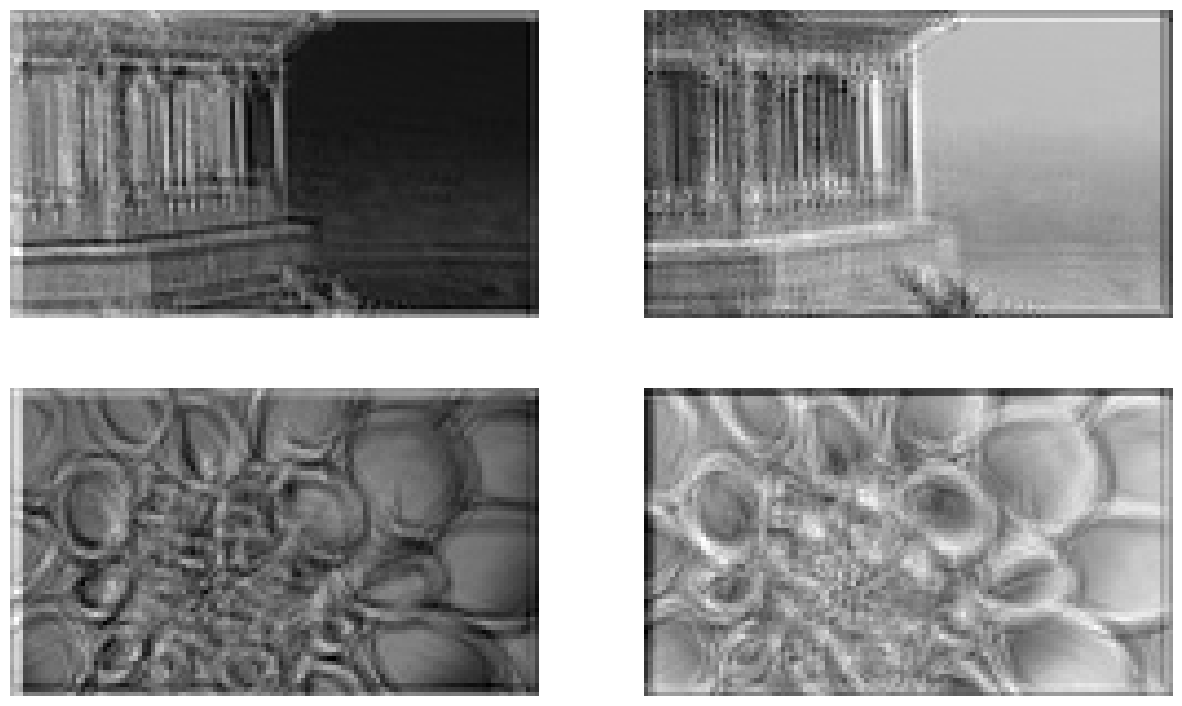

In [ ]:
plt.figure(figsize=(15,9))
for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2,image_idx * 2 + fmap_idx +1)
    plt.imshow(fmaps[image_idx, :,:, fmap_idx], cmap='gray')
    plt.axis("off")

plt.show()

When the stride is greater than 1 (in any direction)
then the output size will not be equal to the input size, even when padding is 'same'.

suppose stride is 2 then

In [ ]:
conv_layer= tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding='same',
                                   strides=2)

fmaps= conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

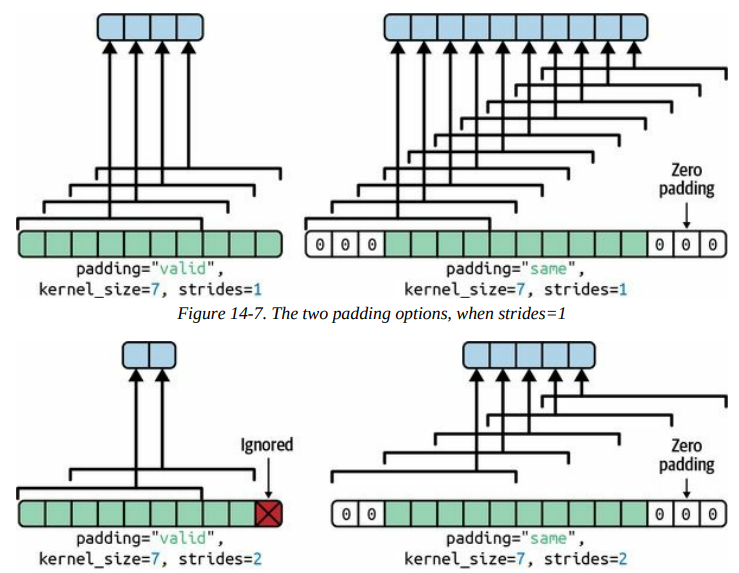

A convolutional layer performs a linear operation , so if stacked multiple convolutional layers without any activation functions they would all be equivalant to a single convolutional layer, and they wouldn't be able to learn anything really complex.

Convolutional layer hyperparameters: filters, kernel_size, padding, strides, activation, kernel_initializer.

As always, you can cross-validation to find the right hyperparameter values, but this is very time-consuming.


In [ ]:
'''
Below function can be useful to compute the size of the feature maps output by a
convolutional layer. It also returns the number of ignored rows or columns if
padding="valid", or the number of zero-padding rows or columns if padding ="same"
'''

import numpy as np

def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
  if padding=="valid":
    z= input_size - kernel_size +strides
    output_size= z // strides
    num_ignored= z % strides
    return output_size, num_ignored

  else:
    output_size= (input_size - 1)//strides + 1
    num_padding= (output_size - 1) * strides + kernel_size - input_size
    return output_size, num_padding

conv_output_size(np.array([70,120]), kernel_size=7, strides=2, padding='same')


(array([35, 60]), array([5, 5]))

Weights

In [ ]:
kernels, biases= conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [ ]:
biases.shape

(32,)

In [ ]:
tf.random.set_seed(42)
filters= tf.random.normal([7,7,3,2])
biases=tf.zeros([2])
fmaps=tf.nn.conv2d(images, filters, strides=1, padding="SAME") +biases

In [ ]:
temp=np.zeros([7, 7, 3, 2])
'''
7: first dimension
7: second dimension
3: Third dimension
2: Fourth dimension

there are 7X7: A grid of 49 elements
3X2: each element in the 7X7 grid is a 3X2 matrix
'''

'\n7: first dimension\n7: second dimension\n3: Third dimension\n2: Fourth dimension\n\nthere are 7X7: A grid of 49 elements\n3X2: each element in the 7X7 grid is a 3X2 matrix\n'

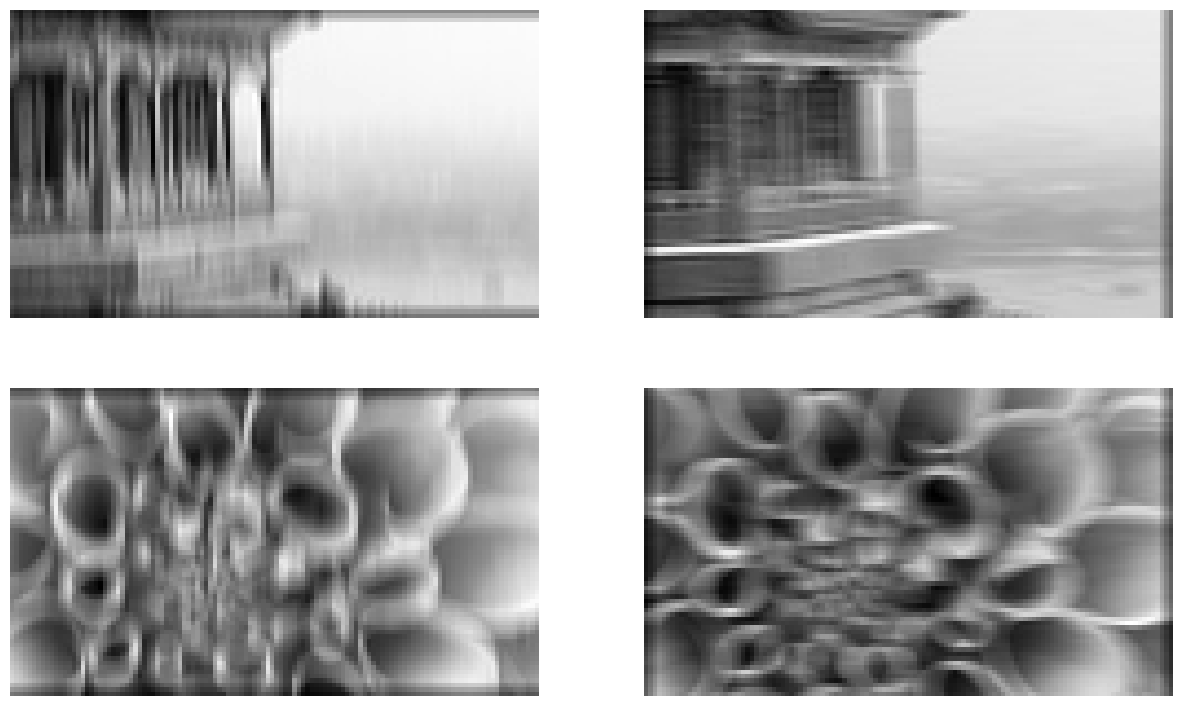

In [ ]:

plt.figure(figsize=(15, 9))
filters = np.zeros([7, 7, 3, 2])
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

In above image because of zero padding the two feature maps based on the vertical line filter (the two left images) could not fully activate near the top and bottom of the images. Similarly the two feature maps based on the horiontal line filter (the two right images) could not fully activate near the left and right of the image.

# ${Pooling \ Layers}$

The goal is to subsample (shrink) the input image in order to reduce the computational load, the memory uses , and the number of parameters (thereby limiting the risk of overfitting).

Each neuron in a pooling layer is connected to the output of a limited number of neurons in the previous layer, located within a small rectengular receptive field. Must define the receptive size, stride and the padding type.

Pooling neurons has no weights; all it does is aggregate the inputs using an aggregation function such as the max and mean. When stride of 2 , the output image has half the height and half the width of the input image.

Max pooling also create invariance, however goal is to create equivariance and not invariance.

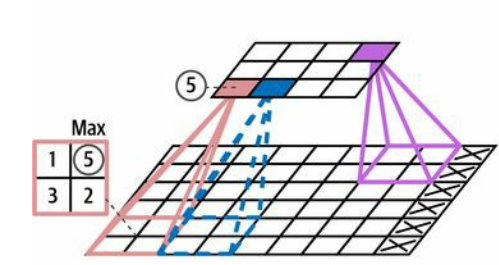

## ${Implementing \ Pooling  \ Layers \ with \ Keras}$



In [ ]:
# Max pooling
'''
Below code creates a MaxPooling2D layer, alias MaxPool2D, using a 2X2 kernel.
The stride default to the kernel size, so this layer uses a
stride of 2(horizontally and vertically).
By default it uses "valid" padding(no padding).
'''
max_pool= tf.keras.layers.MaxPool2D(pool_size=2)

In [ ]:
output=max_pool(images)

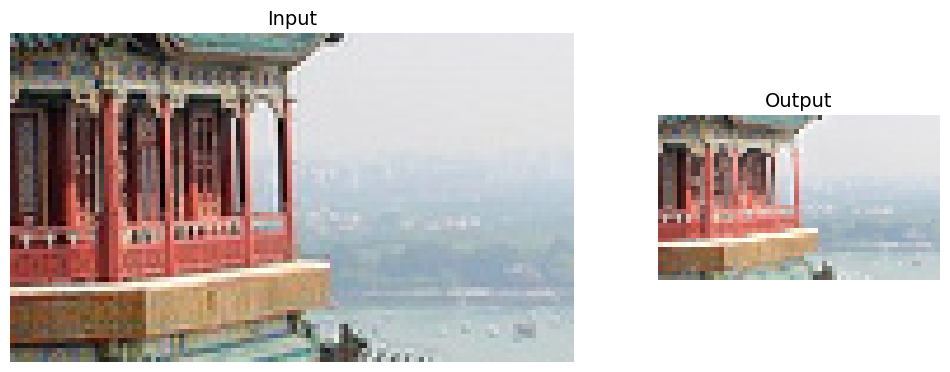

In [ ]:
import matplotlib as mpl

fig= plt.figure(figsize=(12,8))
gs=mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2,1])

ax1= fig.add_subplot(gs[0,0])
ax1.set_title("Input")
ax1.imshow(images[0])
ax1.axis("off")
ax2= fig.add_subplot(gs[0,1])
ax2.set_title("Output")
ax2.imshow(output[0])
ax2.axis("off")
plt.show()

Average Pooling layer: it computes mean rather than max. Max pooling offers stronger translation invariance than average pooling, and it requires slightly less compute.

In [ ]:
avg_pool=tf.keras.layers.AvgPool2D(pool_size=2)

In [ ]:
output_avg=avg_pool(images)

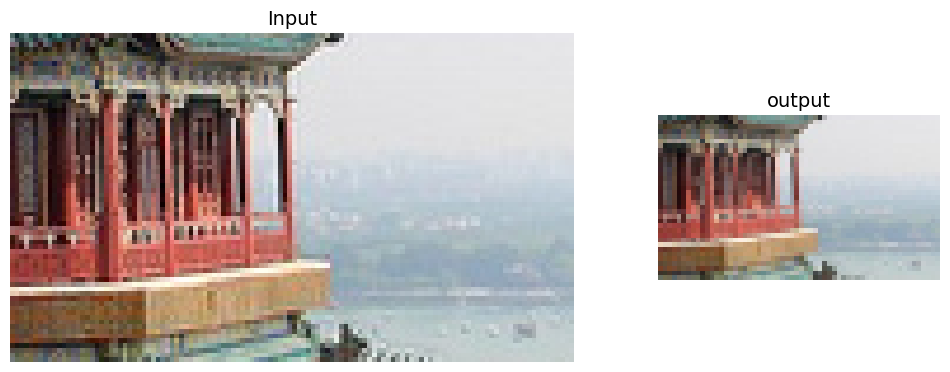

In [ ]:
import matplotlib as mpl
fig= plt.figure(figsize=(12,8))
gs=mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2,1])

ax1=fig.add_subplot(gs[0,0])
ax1.set_title("Input")
ax1.imshow(images[0])
ax1.axis("off")
ax2=fig.add_subplot(gs[0,1])
ax2.set_title("output")
ax2.imshow(output_avg[0])
ax2.axis("off")
plt.show()

Invariance: ability to recognize patttern regardless of certain variations.
like:
1. Thickness: The network can identify objects or features regardless of their thickness.
2. Brightness: It can recognize patterns even if the brighness of the image changes.
3. Skew: The network can detect features even if they are skewed or tilted.
4. Color: It can identify objects regardless of their color.

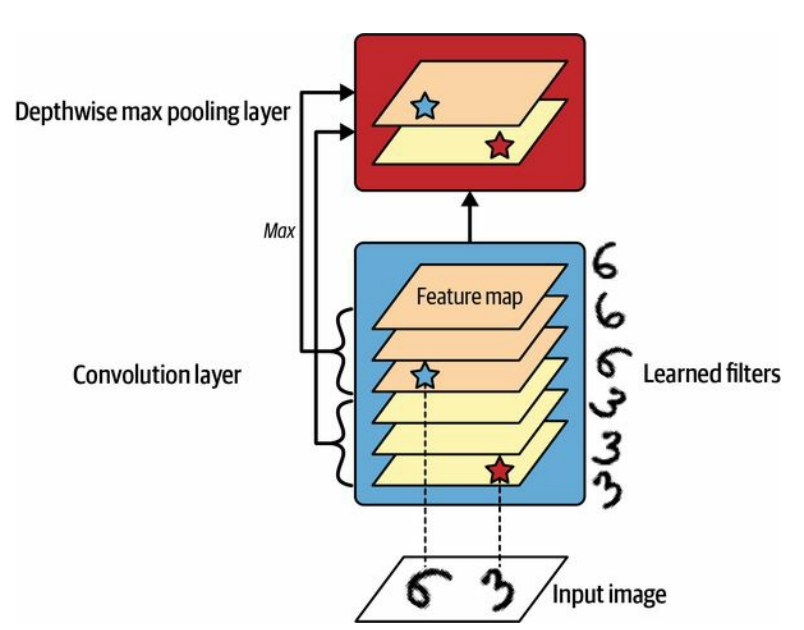

### Depth-wise Pooling

In [ ]:
np.random.seed(42)
fmaps=np.random.rand(2,70,120,60)
with tf.device("/cpu:0"):
  output= tf.nn.max_pool(fmaps, ksize=(1,1,1,3), strides=(1,1,1,3),
                         padding="VALID")

output.shape

TensorShape([2, 70, 120, 20])

In below custom class:
It creates a cutom layer which reshapes its inputs to split the channels into groups of the desired size(pool_size), then it uses tf.reduce_max() to compute the max of each group. This implementation assumes that the stride is equal to the pool size.

In [ ]:
class DepthPool(tf.keras.layers.Layer):
  def __init__(self, pool_size=2, **kwargs):
    super().__init__(**kwargs)
    self.pool_size= pool_size

  def call(self, inputs):
    shape= tf.shape(inputs) #shape[-1] is the number of channels
    groups= shape[-1] //self.pool_size #number of channel groups
    new_shape= tf.concat([shape[:-1],[groups, self.pool_size]], axis=0)
    return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

In [ ]:
np.allclose(DepthPool(pool_size=3)(fmaps), output)

True

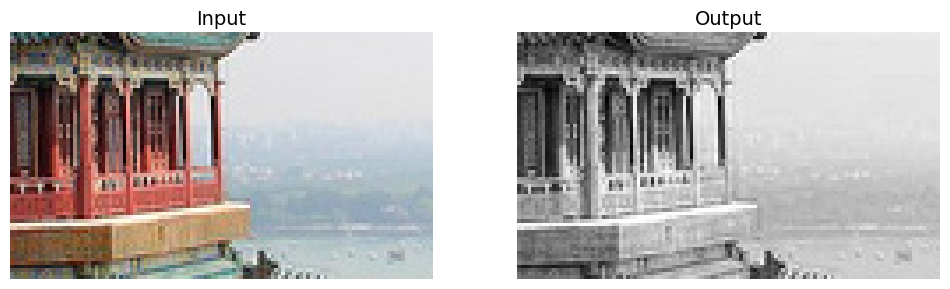

In [ ]:
# Computes and display the output of the depthwise pooling layer

depth_output= DepthPool(pool_size=3)(images)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Input")
plt.imshow(images[0]) #plot the first image
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Output")
plt.imshow(depth_output[0,...,0], cmap="gray")
plt.axis("off")
plt.show()

$Global \ average \ pooling$

It calculates mean for feature map means it will give one single number for one entire feature map, it is good to implement just before output layer. To create this layer can use GlobalAveragePooling2D class, alias GlobalAvgPool2D:

In [ ]:
global_avg_pool= tf.keras.layers.GlobalAvgPool2D()

The following layer is equivalent

In [ ]:
global_avg_pool= tf.keras.layers.Lambda(
    lambda X: tf.reduce_mean(X, axis=[1,2])
)

applied to the input images, it computes mean intensity of red, green, and blue for each image.

In [ ]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.2601113 , 0.10849128]], dtype=float32)>

# $CNN \ Architectures$

it stack a few convolutional layers( each one generally followed by a ReLU layer), then pooling layer and another few convolutional layers (+ ReLU), then another pooling layer, and so an.

The image gets smaller and smaller as it progresses through the network, but it also gets deeper and deeper (with more feature maps), at the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers(+ReLU) and a final layer outputs the prediction (e.g. a softmax layer that outputs estimated class probabilities).

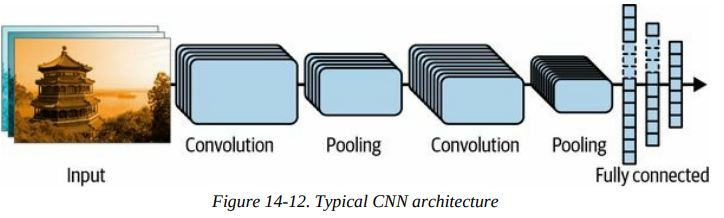

In [ ]:
# Example to implement a basic CNN to tackle the Fashion MNIST dataset.
'''
Load the mnist dataset , add the channels axis to the inputs,
scales the values to the 0-1 range , and splits the dataset
'''

mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full),(X_test, y_test)=mnist
#below line of code is
# Adding a channel dimension np.expand_dims(X_train_full, axis=-1) ,
# e.g. in case of gray scale (batch_size, height, width,1 )
# converting the data type to float32
#normalizing the pixel values.
X_train_full= np.expand_dims(X_train_full, axis=-1).astype(np.float32) /255
X_test=np.expand_dims(X_test.astype(np.float32), axis=-1) /255
X_train, X_valid= X_train_full[:-5000],X_train_full[-5000:]
y_train, y_valid= y_train_full[:-5000], y_train_full[-5000:]



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


in below code:
1. functools.partial() function to define DefaultConv2D, which acts just like Conv2D but with different arguments: a small kernel size of 3, "same " padding, the ReLU activation function and its corresponding He initializer.

2. Created the Sequential model. its first layer is DefaultConv2D with 64 fairly large filters(7 X 7). it uses default stride of 1 because the input images are not very large. it also set the input_shape=[28,28,1], because the images are 28x28 piels, with a single color channel. for MNIST dataset, we need to make sure each image has same shape, and can use np.reshape() or np.expanddims() to add the channels dimension. Can also use Reshape layer as the first layer in the model.

3. then added MaxPooling layer that uses the default pool size of 2, so it divides each spatial dimension by a factor of 2.

4. Then repeated the same structure twice: two convolutional layers followed by ma pooling. For large images, can repeat this structure several more times. Number of repeatition is hyperparameter can tune.

5. Number of filters doubles as we climb up the cnn toward the output layer (initially 64, then 128 then 256): since the number of low-level features is often fairly low (e.g. small circle, horizontal lines), but there are many different ways to combine them into higher-level features. It is common practice to double the number of filters after each pooling layer: since a pooling layer divides each spatial dimension by the factor of 2, we can afford to double the number of feature maps in the next layer without fear of exploding the number of parameters, memory uses, or computational load.

6. Next is the fully connected network, composed of two hidden dense layers and a dense output layer, Since it's a classification task with 10 classes, the output layer has 10 units, and it uses the softmax activation function. Note that we must flatten the inputs just before the first dense layer, since it expects a 1D array of features for each instance, we also add two dropout layers, with a dropout rate of 50% each



In [ ]:
from functools import partial

tf.random.set_seed(42)
DefaultConv2D= partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                       activation="relu", kernel_initializer="he_normal")

model= tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28,28,1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64,activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile, fits, evaluates, and uses the model to make prediction.
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history=model.fit(X_train,y_train, epochs=10,
                  validation_data=(X_valid,y_valid))
score=model.evaluate(X_test, y_test)
X_new=X_test[:10] #pretend we have new images
y_pred= model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1004s 577ms/step - accuracy: 0.5872 - loss: 1.1341 - val_accuracy: 0.8700 - val_loss: 0.3898
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 896s 492ms/step - accuracy: 0.8376 - loss: 0.4719 - val_accuracy: 0.8802 - val_loss: 0.3339
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 838s 487ms/step - accuracy: 0.8703 - loss: 0.3837 - val_accuracy: 0.8912 - val_loss: 0.3124
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 863s 488ms/step - accuracy: 0.8860 - loss: 0.3399 - val_accuracy: 0.9044 - val_loss: 0.2727
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 842s 490ms/step - accuracy: 0.8967 - loss: 0.3070 - val_accuracy: 0.9000 - val_loss: 0.2788
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 837s 487ms/step - accuracy: 0.9025 - loss: 0.2853 - val_accuracy: 0.9052 - val_loss: 0.2957
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 881s 498ms/step - accuracy: 0.9098 - loss: 0.2676 - val_accuracy: 0.9036 - val_loss: 0.2895
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 837s 484ms/step - a

In [ ]:
1+1

2

# $\mathrm {LeNet-5}$

- widely used for handwritten digit recognition.
- In is 32X32 because of zero padding(in below architecture diagram)

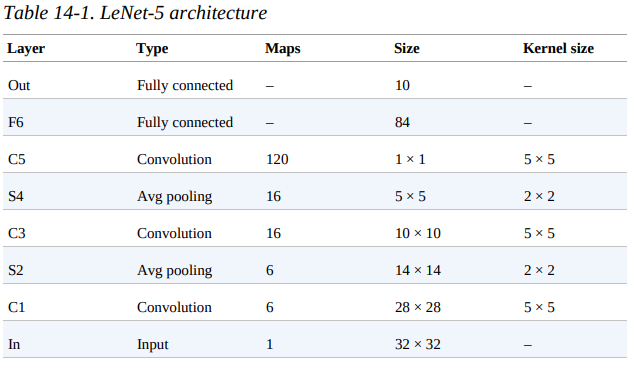

$\mathrm{AlexNet}$

It also uses a competitive normalization step immediately aftert the ReLU step oflayers C1 and C3, called local response normalization (LRN): te most strongly activated neurons inhibit other neurons located at the same position in neighboring feature maps. Such competitive activation has been observed in biological neurons. This encourages different feature maps to specialize, pushing them apart and forching them to explore a wider range of features, ultimately improving generalization.

$b_i=a_i k+\alpha \sum_{j=j_{low}}^{j_{high}} a_j^2 -\beta $

where :

$j_{high}=min\begin{pmatrix} i+\frac{r}{2}, f_n-1\end{pmatrix}$

$j_{low}=max\begin{pmatrix} 0,i-\frac{r}{2} \end{pmatrix}$


In this equation:
- $b_i$ is the normalized output of the neuron located in feature map $i$, at some row $u$ and column $v$ (in this equation only those neurons considered located at row and column $u$ & $v$) and that is the reason $u$ and $v$ are not shown.

- $a_i$ is the activation of that neuron after the ReLU step, but before normalization.

- $k$, $\alpha$, $\beta$ and $r$ are hyperparameters. $k$ is called bias, and $r$ is called the depth radius.

- $f_n$ is the number of feature maps.

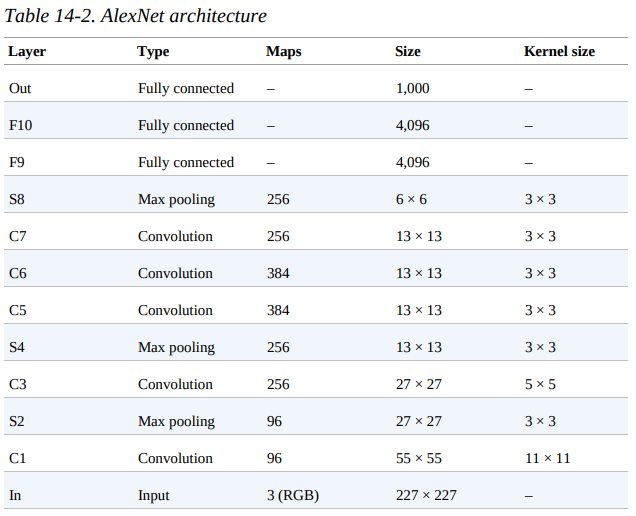

Data augmentation: can be used to rotate , crop ,shift images and it works as a regularizer that helps to avoid overfitting and also helpful when unbalanced dataset, as it helps to add more samples of the less frequent classes. This is called the synthetic minority oversampling technique (SMOTE).

$\mathrm{GoogLeNet}$


The notation “3
× 3 + 1(S)” means that the layer uses a 3 × 3 kernel, stride 1, and "same"
padding. The input signal is first fed to four different layers in parallel. All
convolutional layers use the ReLU activation function. Note that the top
convolutional layers use different kernel sizes (1 × 1, 3 × 3, and 5 × 5),
allowing them to capture patterns at different scales. Also note that every
single layer uses a stride of 1 and "same" padding (even the max pooling
layer), so their outputs all have the same height and width as their inputs.
This makes it possible to concatenate all the outputs along the depth
dimension in the final depth concatenation layer (i.e., to stack the feature
maps from all four top convolutional layers). It can be implemented using
Keras’s Concatenate layer, using the default axis=-1.

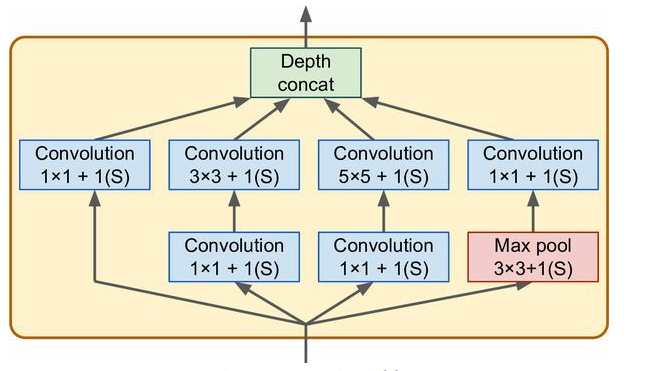

In above diagram , although 1X1 cannot capture the spatial patterns, they can capture patterns along the depth dimension(across channels).

They are configured to output fewer feature maps then their inputs, so they serve as bottleneck layers, meaning they reduce dimensionality.
This cuts the computational cost and the number of parameters, speeding up training and improving generalization.

Each pair of convolutional layers ([1X1, 3X3] and [1X1, 5X5]) acts like a single powerful convolutional layer, capable of capturing more complex patterns.A convolutional layer is equivalent to sweeping a
dense layer across the image (at each location, it only looks at a small
receptive field), and these pairs of convolutional layers are equivalent to
sweeping two-layer neural networks across the image.

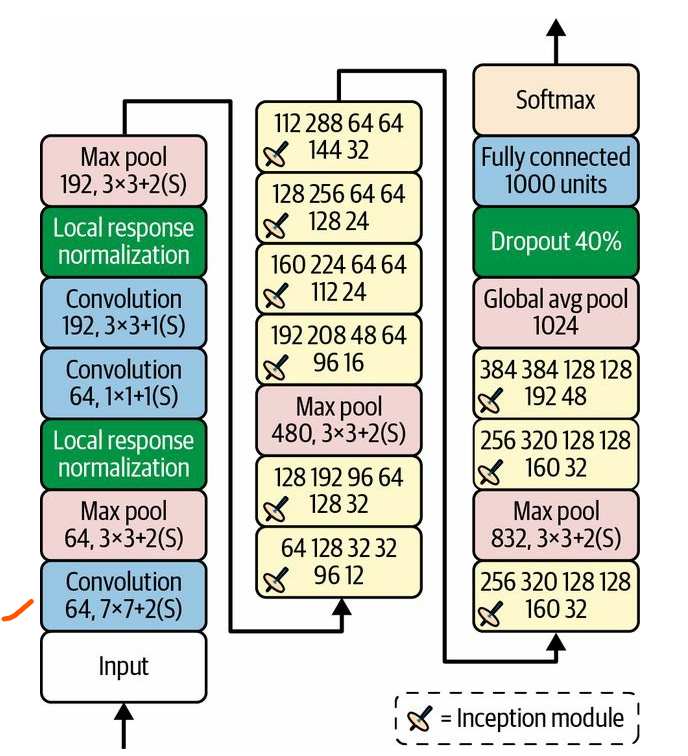

$\mathrm{VGGNet}$

it had 2 or 3 convolutional layers and a pooling layer, then again
2 or 3 convolutional layers and a pooling layer, and so on (reaching a total of
16 or 19 convolutional layers, depending on the VGG variant), plus a final
dense network with 2 hidden layers and the output layer. It used small 3 × 3
filters, but it had many of them.

$\mathrm{ResNet}$



- Used extremely deep CNN composed of 152 layers.
- It confirmed the general trend : Computer vision models were getting deeper and deeper, with fewer and fewer parameters.

- The key to being able to train such deep network is to use skip connections.

- When training a NN, the goal is to make it model a target function $h(\mathbf{x})$.

- Adding input $\mathbf{x}$ to the o/p of the network (that is adding a skip connection), then the network will be forced to model $f(\mathbf{x})=h(\mathbf{x})-\mathbf{x}$ rather than $h(\mathbf{x})$.



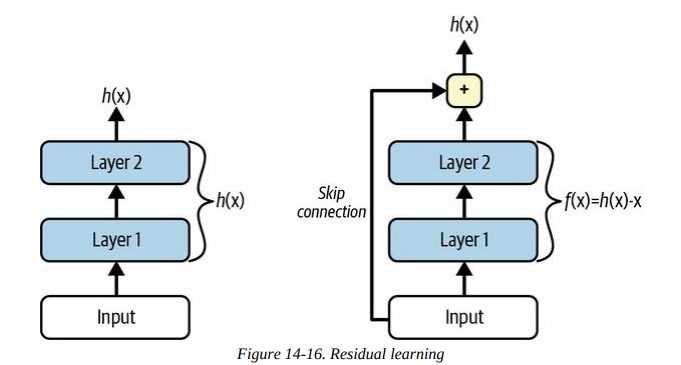

## $\text{Implementing a ResNet-34 CNN Using Keras}$

In [ ]:
DefaultConv2D=partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                      padding="same", kernel_initializer="he_normal",
                      use_bias=False)

In [ ]:
class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation=tf.keras.activations.get(activation)
    self.main_layers=[
        DefaultConv2D(filters, strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        tf.keras.layers.BatchNormalization()
    ]

    self.skip_layers=[]
    if strides > 1:
      self.skip_layers=[
          DefaultConv2D(filters, kernel_size=1, strides=strides),
          tf.keras.layers.BatchNormalization()
      ]

  def call(self, inputs):
    Z=inputs
    for layer in self.main_layers:
      Z=layer(Z)
    skip_Z= inputs
    for layer in self.skip_layers:
      skip_Z= layer(skip_Z)
    return self.activation(Z + skip_Z)

In [ ]:
model= tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[224, 224, 3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")
])
#[64] *3 + [128] * 4 +[256] * 6 + [512] * 3
#[64,64,64,128,128,128,128,256,256,256,256,256,256,512,512,512]
prev_filters = 64
for filters in [64] *3 + [128] * 4 +[256] * 6 + [512] * 3:
  strides= 1 if filters==prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters= filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation="softmax"))


$\text{Using Pretrained Models from Keras}$

In [ ]:
'''
Loading ResNet-50 model , pretrained on ImageNet, with the following line of
code:
'''
model=tf.keras.applications.ResNet50(weights="imagenet")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
'''
tf.keras.backend provides various utility functions for interacting with the backend
engine (such as TensorFlow, Theano, or CNTK). it allows to perform low-level operations that are
not directly accessible through the high-level keras API.
'''

'''
To use ResNet50 model first need to ensure that the images have the right size.
A ResNet-50 model expects 224X224 -pixel image , so using Keras Resizing layer to resize two sample image
'''
K=tf.keras.backend
images= K.constant(load_sample_images()["images"])
images_resized = tf.keras.layers.Resizing(height=224, width=224,
                                          crop_to_aspect_ratio=True)(images)

The pretrained models assume that the images are preprocessed in a specific
way. In some cases they may expect the inputs to be scaled from 0 to 1, or
from –1 to 1, and so on. Each model provides a preprocess_input() function
that you can use to preprocess your images. These functions assume that the
original pixel values range from 0 to 255, which is the case here:

In [ ]:
inputs=tf.keras.applications.resnet50.preprocess_input(images_resized)

As usual, the output Y_proba is a matrix with one row per image and one
column per class (in this case, there are 1,000 classes). To display the top K predictions , including the class name and the estimated probability of each predicted class, using the decode_prediction() function. For each image it returns an array containing the to K predictions, where each predicion is represented as an array containing the class identifier. its name, and the corresponding confidence score.

In [ ]:
Y_proba= model.predict(inputs)
Y_proba.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(2, 1000)

The correct classes are palace and dahlia, so the model is correct for the first image but wrong for the second. However , that's because dahlia is not one of the 1000 ImageNet classes. So vase is a reasonable guess (perhaps the flower is in a vase) and daisy is not a bad choice either, since dahlias and dalisies are both from the same Compositae family.

In [ ]:
top_K= tf.keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
  print(f"Image #{image_index}")
  for class_id, name, y_proba in top_K[image_index]:
    print(f" {class_id} - {name:12s} {y_proba:.2%}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Image #0
 n03877845 - palace       54.69%
 n03781244 - monastery    24.71%
 n02825657 - bell_cote    18.55%
Image #1
 n04522168 - vase         32.67%
 n11939491 - daisy        17.82%
 n03530642 - honeycomb    12.04%


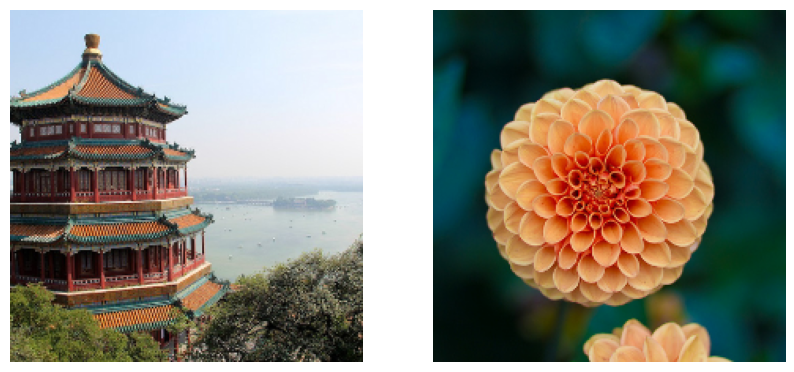

In [ ]:
plt.figure(figsize=(10, 6))
for idx in (0,1):
  plt.subplot(1, 2, idx + 1)
  plt.imshow(images_resized[idx]/ 255)
  plt.axis("off")

plt.show()

So above concluded how can pretrained model used related with ImageNet.

$\text {Pretrained Models for Transfer Learning}$

how to use image classifiers for classes of images that are not part of ImageNet?

A pretrained models can still be used here...

When building of image classifier is required however enough data is not available to train it from scratch, then it is often a good idea to reuse the lower layers of a pretrained model. In below code I am using pretrained model Xception to train with my data.

In [ ]:
import tensorflow_datasets as tfds

dataset, info= tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size= info.splits["train"].num_examples
class_names=info.features["label"].names
n_classes=info.features["label"].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.GJD0Q5_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset_size

3670

In [ ]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [ ]:
n_classes

5

Note that you can get information about the dataset by setting
with_info=True. Here, we get the dataset size and the names of the classes.
Unfortunately, there is only a "train" dataset, no test set or validation set, so
we need to split the training set. Let’s call tfds.load() again, but this time
taking the first 10% of the dataset for testing, the next 15% for validation,
and the remaining 75% for training:

In [ ]:
test_set_raw, valid_set_raw, train_set_raw= tfds.load(
    "tf_flowers",
    split=["train[:10%]","train[10%:25%]", "train[25%:]"],
    as_supervised=True
)

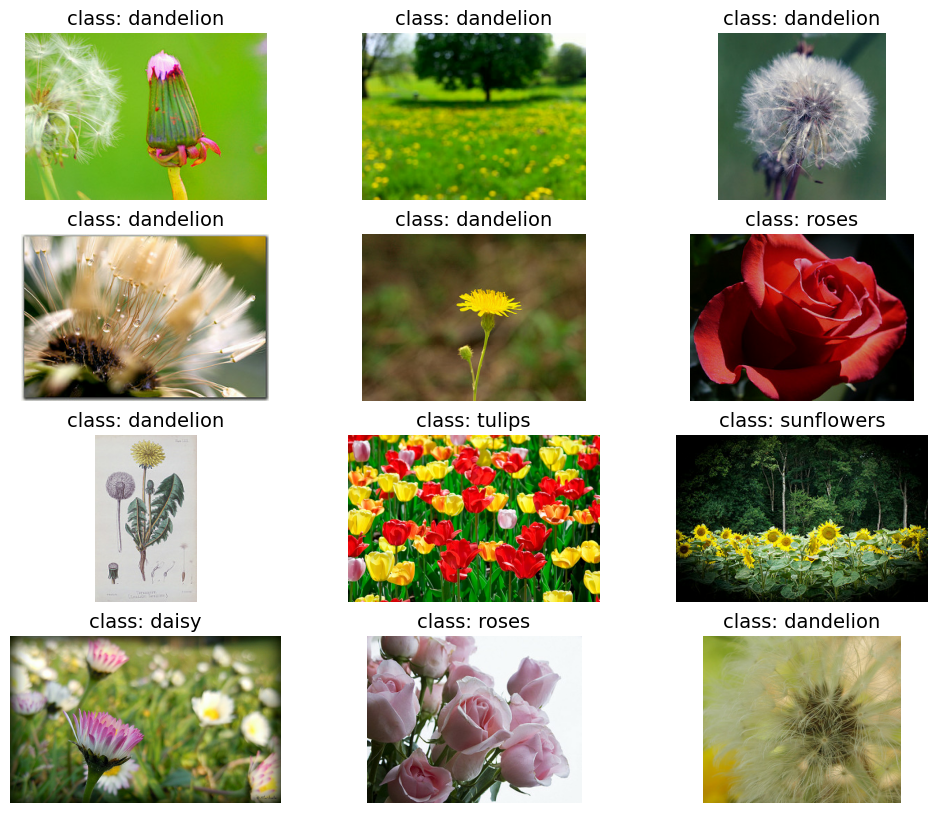

In [ ]:
plt.figure(figsize=(12,10))
index=0
for image, label in valid_set_raw.take(12):
  index +=1
  plt.subplot(4,3, index)
  plt.imshow(image)
  plt.title(f"class: {class_names[label]}")
  plt.axis("off")

plt.show()

$\text{Xception}$

- It replaces the inception modules with a special type of layer called a $\text{depthwise separable convolution layer}$

- While a regular convolutional layer uses filters that try to simultaneously capture spatial pattern (e.g. an oval) and cross-channel patterns (e.g mouth + nose+eyes=face), a separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately.

- this is composed of two part: the first part applies a single spatial filter to each input feature map, then the second part looks exclusively for cross-channel patterns- it is just a regular convolutional layer with $1 \times 1$ filters.

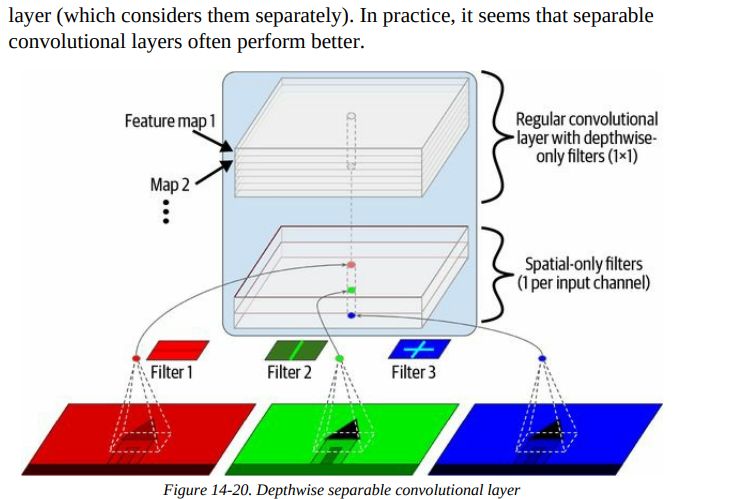

All three datasets contains individual images.
- resize all of the images to same size. can use `Resizing` layer.
- need to call `tf.keras.applications.xception.preprocess_input()` function to preprocess the images appropriately for Xception model.
- add shuffling and prefetching to the training dataset.
- pass images as a batch

-Now each batch contains 32 images, all of them 224 × 224 pixels, with pixel
values ranging from –1 to 1.

In [ ]:
tf.keras.backend.clear_session() # to resets layer name counter

batch_size=32
preprocess= tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

train_set = train_set_raw.map(lambda X, y : (preprocess(X),y))
train_set= train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set= valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set= test_set_raw.map(lambda X, y: (preprocess(X),y)).batch(batch_size)

Checking again first 12 images from the validation set:
they're all 224X224 now, with values ranging from -1 to 1

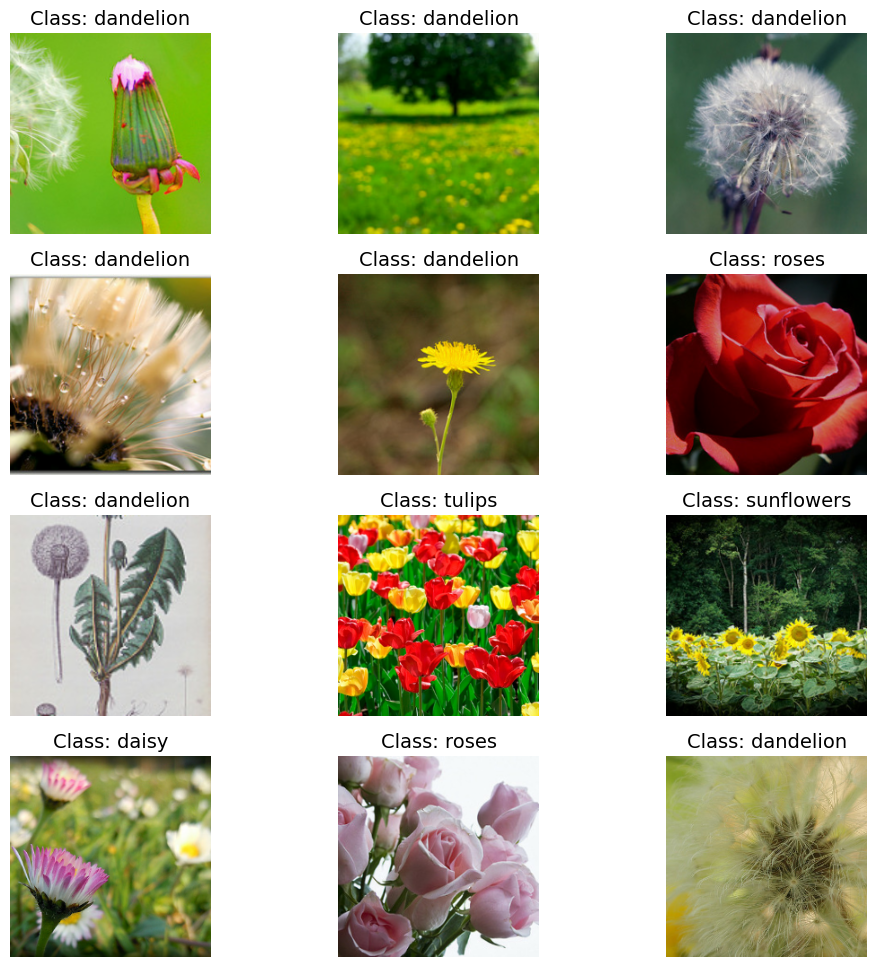

In [ ]:
plt.figure(figsize=(12,12))
for X_batch, y_batch in valid_set.take(1):
  for index in range(12):
    plt.subplot(4, 3, index + 1)
    plt.imshow((X_batch[index] + 1)/2) # rescale to 0-1 for imshow()
    plt.title(f"Class: {class_names[y_batch[index]]}")
    plt.axis("off")

plt.show()

Since the dataset is not very large, a bit of data augmentation will certainly
help. Let’s create a data augmentation model that we will embed in our final
model.

During training, it will randomly flip the images horizontally, rotate
them a little bit, and tweak the contrast

In [ ]:
data_augmentation= tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05,seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)

])

will run below code multiple times to see different random data augmentation

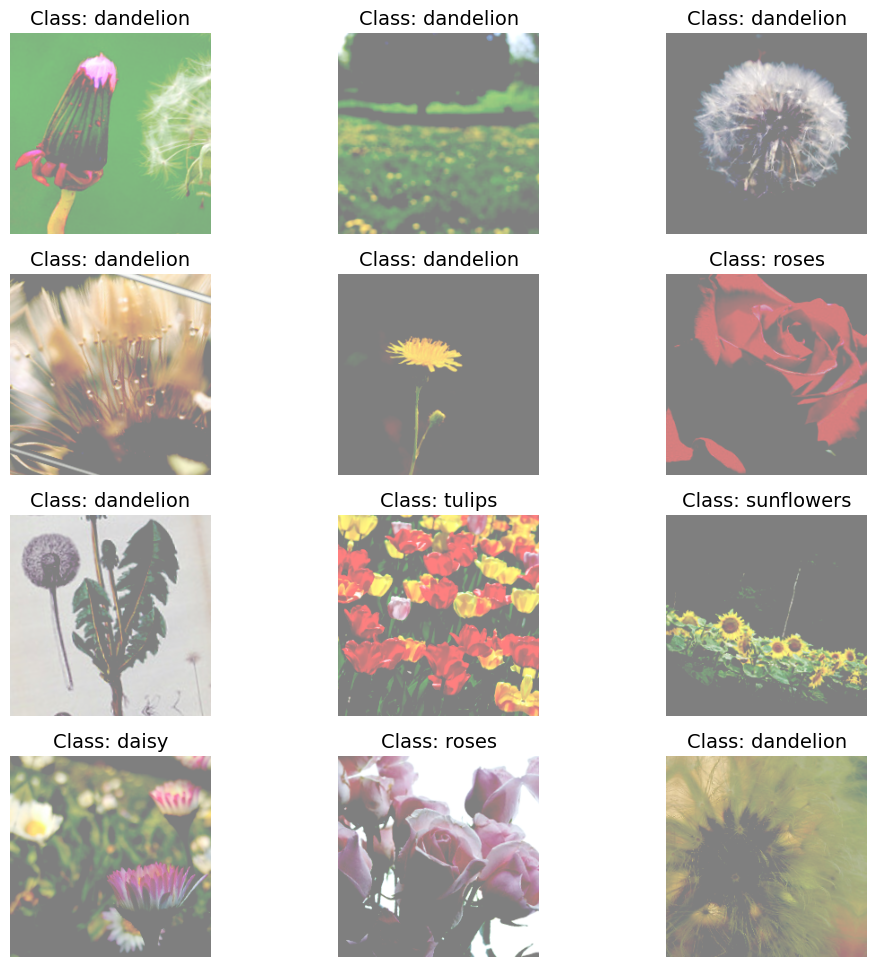

In [ ]:
plt.figure(figsize=(12,12))
for X_batch, y_batch in valid_set.take(1):
  X_batch_augmented= data_augmentation(X_batch, training=True)
  for index in range(12):
    plt.subplot(4,3, index + 1)
    #rescaling of image to 0-1 is important for imshow()
    # clip the result to that range,
    # make some values go out of bounds (e.g. , RandomContrast in this case)
    plt.imshow(np.clip((X_batch_augmented[index] + 1 )/2, 0, 1)) # this will make sure all values fall under 0-1
    plt.title(f"Class: {class_names[y_batch[index]]}")
    plt.axis("off")

plt.show()

Next let’s load an Xception model, pretrained on ImageNet. We exclude the
top of the network by setting include_top=False. This excludes the global
average pooling layer and the dense output layer.

We then add our own
global average pooling layer (feeding it the output of the base model),
followed by a dense output layer with one unit per class, using the softmax
activation function. Finally, we wrap all this in a Keras Model:


In [ ]:
tf.random.set_seed(42)
base_model=tf.keras.applications.xception.Xception(weights="imagenet",
                                                   include_top=False)

avg= tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output= tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model= tf.keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


it’s usually a good idea to freeze the weights of
the pretrained layers, at least at the beginning of training:

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

training the model for a few epochs, while keeping the base model weights fixed:

After training the model for a few epochs, its validation accuracy should
reach a bit over 80% and then stop improving. This means that the top layers
are now pretty well trained, and we are ready to unfreeze some of the base
model’s top layers,then continue training.

In [ ]:
optimizer= tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=3)

In [ ]:
for indices in zip(range(33), range(33, 66), range(66,99), range(99,132)):
  for idx in indices:
    print(f"{idx:3} : {base_model.layers[idx].name:22}", end="")
  print()

Now that the weight of the new top layers are not too bad, can make top part of the base model trainable again, and continue training , but with a lower learning rate:

unfreezing layers
56 and above (that’s the start of residual unit 7 out of 14, as I can see if
list the layer names):
compile the model whenever  freeze or unfreeze layers.

In [ ]:
for layer in base_model.layers[56:]:
  layer.trainable = True

optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

## $\text{Classification and Localization}$

**Note**: the code below used to reuse the optimizer from the previous model. This was fine in earlier versions of TensorFlow, but in more recent versions it can cause some issues, so I added a line to create a new optimizer here. Also, recent versions of Keras expect one metric per output, so I added the `"mse"` metric to the list.

Localizing an object in a picture can be expressed as a regression task.




To annotate images with bounding boxes, we need to use an open source image labeling tool like VGG Image Annotator, LabelImg, OpenLabeler, or ImgLab, or perhaps a commercial tool like LabelBox or Supervisely. We may also want to consider crowdsourcing platforms such as Amazon Machanical Turk if we have a very large number of images to annotate.


 need to create a dataset whose items will be batches of
preprocessed images along with their class labels and their bounding boxes.
Each item should be a tuple of the form (images, (class_labels,
bounding_boxes)). Then you are ready to train your model!


The bounding boxes should be normalized so that the horizontal and vertical coordinates,
as well as the height and width, all range from 0 to 1. Also, it is common to predict the
square root of the height and width rather than the height and width directly: this way, a
10-pixel error for a large bounding box will not be penalized as much as a 10-pixel error
for a small bounding box.


The MSE often works fairly well as a cost function to train the model, but it
is not a great metric to evaluate how well the model can predict bounding
boxes. The most common metric for this is the intersection over union (IoU):
the area of overlap between the predicted bounding box and the target
bounding box, divided by the area of their union

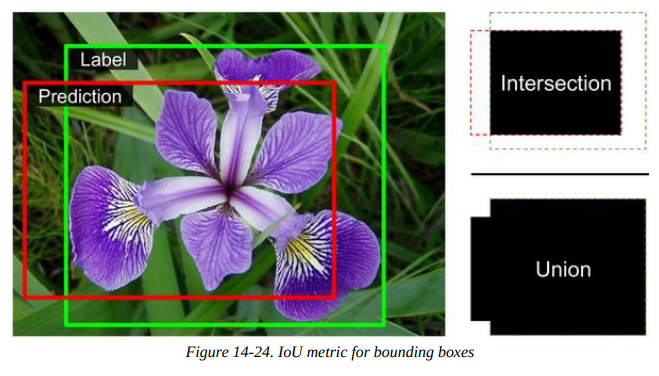

## $\text{Object Detection}$


The task of classifying and localizing multiple objects in an image is called
object detection.



In [ ]:
tf.random.set_seed(42)

base_model= tf.keras.applications.xception.Xception(weights="imagenet",
                                                    include_top=False)

avg= tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output= tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output= tf.keras.layers.Dense(4)(avg)
model= tf.keras.Model(inputs=base_model.input,
                      outputs=[class_output, loc_output])
optimizer= tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[0.8, 0.2],
              optimizer=optimizer, metrics=["accuracy", "mse"])


In [ ]:
#fits the model using random target bounding boxes

def add_random_bounding_boxes(images,labels):
  fake_bboxes= tf.random.uniform([tf.shape(images)[0],4])
  return images, (labels, fake_bboxes)

fake_train_set= train_set.take(5).repeat(2).map(add_random_bounding_boxes)
model.fit(fake_train_set, epochs=2)

$\text{You Only Look Once}$

- It can run in real time on a video.

